In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


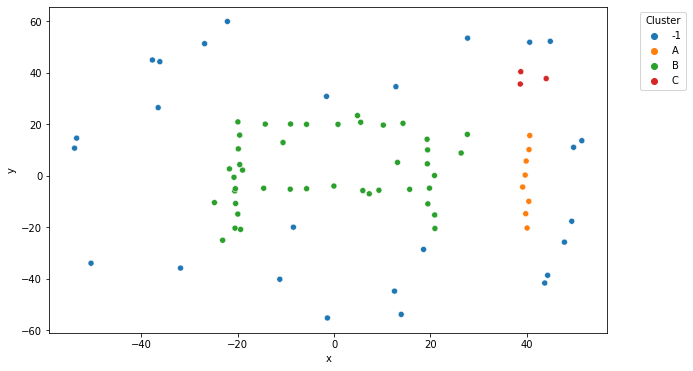

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UML/HW3/dbscan.csv')

eps = 7.5
min_samples = 3
visited_samples = [False for i in range(len(df))]
cluster_labels = [-1 for i in range(len(df))]

core = []
non_core = []


# Neighborhood Creation
# Assigning points as core and non-core

neighbors = {}

for i in range(len(df)):

    n = df.iloc[i,5]
    l = [(lambda x: int(x))(x) for x in n.split(',')]
    neighbors[i] = l

for i in range(len(df)):
    if len(neighbors[i]) >= min_samples:
        core.append(i)
    else:
        non_core.append(i)
        

# Iterate through samples and expand clusters from them if they have more neighbors than min_samples

cn = 'A'

for i in core:

    if visited_samples[i]:
        continue

    stack = [i]
    cluster_labels[i] = cn

    while stack:

        n = stack.pop()

        if visited_samples[n]:
            continue

        visited_samples[n] = True

        # stack.extend(neighbors[n])

        if n in core:
            for nn in neighbors[n]:
                cluster_labels[nn] = cn
            stack.extend(neighbors[n])

        else:
            cluster_labels[n] = cn

    cn = chr(ord(cn) + 1)


# Get the resulting cluster labels

df['cluster'] = cluster_labels


# Plot clusters

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='x', y='y', hue='cluster')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right', title='Cluster')